<a href="https://colab.research.google.com/github/IsraaFahmy/Statistics-and-Data-Science-Micromasters-/blob/main/MITxT%2014.310xDASS/Notebooks/social_w6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Bias/Variance Tradeoff



In [ ]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
#make synthetic regression data
x <- c(1:100)/10
x

[1]  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.0  1.1  1.2  1.3  1.4  1.5
 [16]  1.6  1.7  1.8  1.9  2.0  2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9  3.0
 [31]  3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.0  4.1  4.2  4.3  4.4  4.5
 [46]  4.6  4.7  4.8  4.9  5.0  5.1  5.2  5.3  5.4  5.5  5.6  5.7  5.8  5.9  6.0
 [61]  6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9  7.0  7.1  7.2  7.3  7.4  7.5
 [76]  7.6  7.7  7.8  7.9  8.0  8.1  8.2  8.3  8.4  8.5  8.6  8.7  8.8  8.9  9.0
 [91]  9.1  9.2  9.3  9.4  9.5  9.6  9.7  9.8  9.9 10.0

In [ ]:
y <- 3*x^2 - 2*x + 4 + rnorm(100, sd = 5)

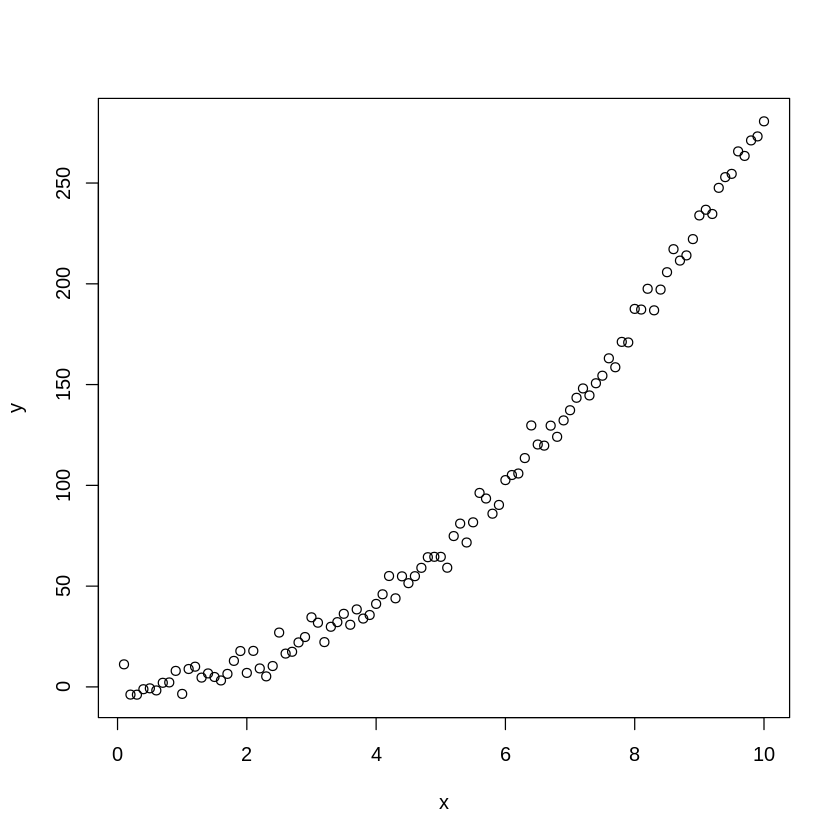

In [ ]:
#plot it
plot(x, y)

In [ ]:
#build regression model
model1 <- lm(y ~ x)
summary(model1)


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-36.966 -19.232  -7.555  16.941  57.605 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -49.2632     4.6064  -10.69   <2e-16 ***
x            28.5030     0.7919   35.99   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 22.86 on 98 degrees of freedom
Multiple R-squared:  0.9297,	Adjusted R-squared:  0.929 
F-statistic:  1295 on 1 and 98 DF,  p-value: < 2.2e-16


In [ ]:
yhat <- predict(model1, newdata = data.frame(x))
yhat

1           2           3           4           5           6 
-46.4129191 -43.5626162 -40.7123133 -37.8620104 -35.0117075 -32.1614046 
          7           8           9          10          11          12 
-29.3111017 -26.4607988 -23.6104959 -20.7601930 -17.9098901 -15.0595872 
         13          14          15          16          17          18 
-12.2092843  -9.3589814  -6.5086785  -3.6583755  -0.8080726   2.0422303 
         19          20          21          22          23          24 
  4.8925332   7.7428361  10.5931390  13.4434419  16.2937448  19.1440477 
         25          26          27          28          29          30 
 21.9943506  24.8446535  27.6949564  30.5452593  33.3955622  36.2458651 
         31          32          33          34          35          36 
 39.0961680  41.9464709  44.7967738  47.6470767  50.4973796  53.3476825 
         37          38          39          40          41          42 
 56.1979854  59.0482883  61.8985912  64.7488941  67.5991971  70.4495000 
         43          44          45          46          47          48 
 73.2998029  76.1501058  79.0004087  81.8507116  84.7010145  87.5513174 
         49          50          51          52          53          54 
 90.4016203  93.2519232  96.1022261  98.9525290 101.8028319 104.6531348 
         55          56          57          58          59          60 
107.5034377 110.3537406 113.2040435 116.0543464 118.9046493 121.7549522 
         61          62          63          64          65          66 
124.6052551 127.4555580 130.3058609 133.1561638 136.0064667 138.8567696 
         67          68          69          70          71          72 
141.7070726 144.5573755 147.4076784 150.2579813 153.1082842 155.9585871 
         73          74          75          76          77          78 
158.8088900 161.6591929 164.5094958 167.3597987 170.2101016 173.0604045 
         79          80          81          82          83          84 
175.9107074 178.7610103 181.6113132 184.4616161 187.3119190 190.1622219 
         85          86          87          88          89          90 
193.0125248 195.8628277 198.7131306 201.5634335 204.4137364 207.2640393 
         91          92          93          94          95          96 
210.1143422 212.9646452 215.8149481 218.6652510 221.5155539 224.3658568 
         97          98          99         100 
227.2161597 230.0664626 232.9167655 235.7670684

In [ ]:
#evaluate RMSE
sqrt(mean((y - yhat)^2))

[1] 22.62995

In [ ]:
model1


Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
     -49.26        28.50  


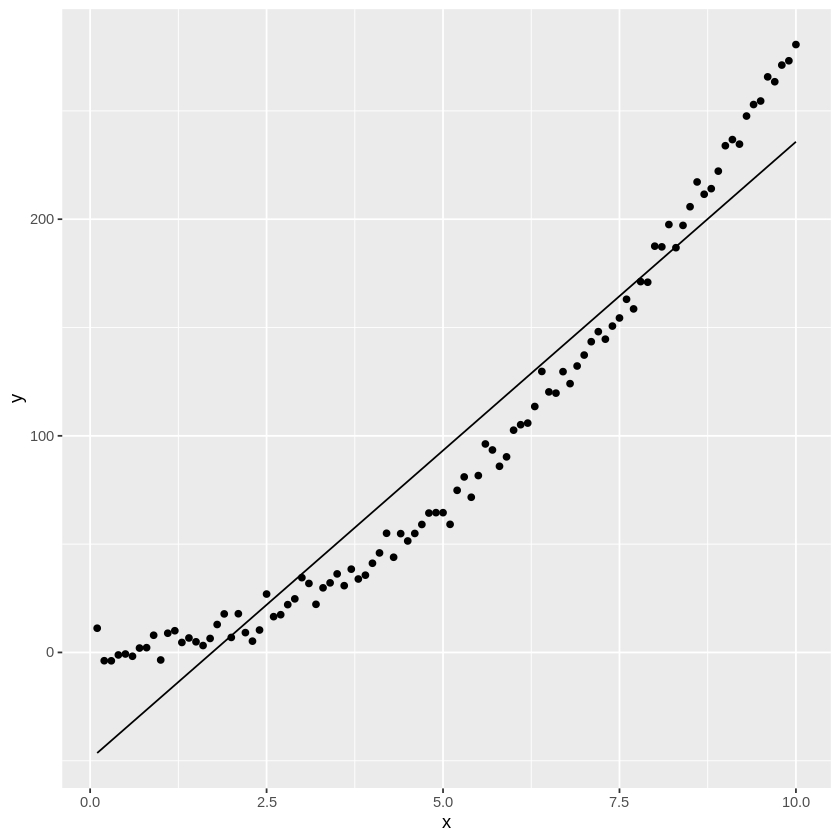

In [ ]:
f <- function (x){
  return (28.5*x - 49.26)
}
#data frame with column x, y, yhat
df <- data.frame(x = x, y = y, yhat = f(x))
ggplot(df) +
  geom_point(aes(x, y)) +
  geom_line(aes(x, yhat))

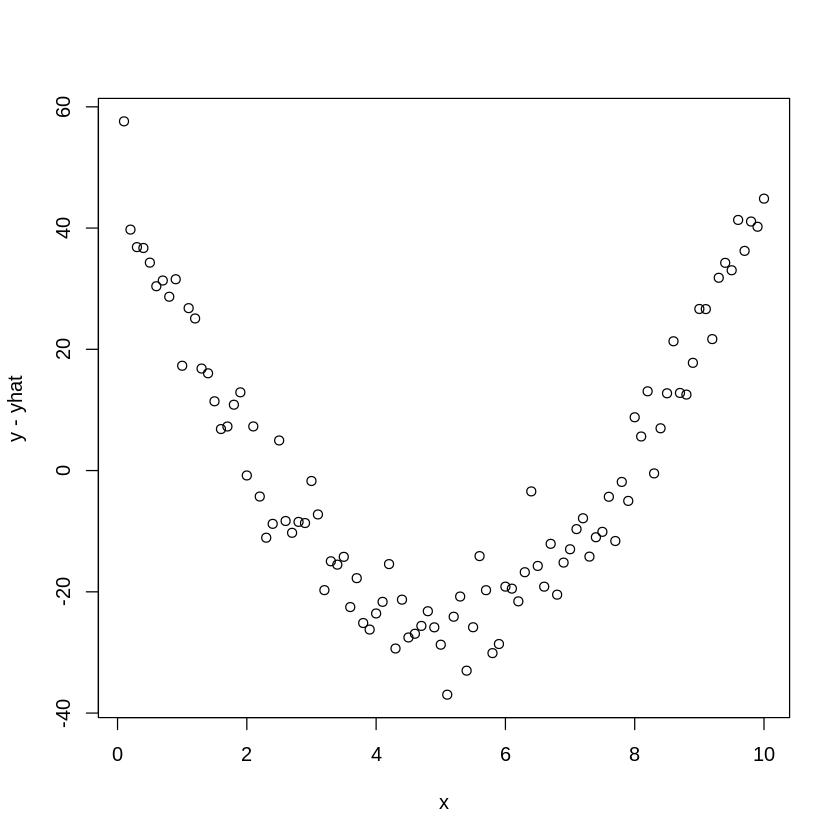

In [ ]:
plot(x, y - yhat)

In [ ]:
sample_n(df, 10)

x,y,yhat
<dbl>,<dbl>,<dbl>
1.5,4.917613,-6.51
5.9,90.292120,118.89
3.3,29.831125,44.79
5.2,74.841745,98.94
9.0,233.918712,207.24
9.2,234.649470,212.94
6.9,132.228506,147.39
4.3,43.947927,73.29
0.6,-1.755441,-32.16


In [ ]:
xsamp <- sample_n(df, 30)

In [ ]:
lm(y ~ x, data = xsamp)


Call:
lm(formula = y ~ x, data = xsamp)

Coefficients:
(Intercept)            x  
     -52.57        29.89  


In [ ]:
#repeat on five samples
rmses <- c(0, 0, 0, 0, 0)
for (i in 1:5){
  xsamp <- sample_n(df, 30)
  samp_model <- lm(xsamp$y ~ xsamp$x)
  yhat <- predict(samp_model, newdata = data.frame(xsamp$x))
  rmse <- sqrt(mean((xsamp$y - yhat)^2))
  rmses[i] = rmse
}

In [ ]:
rmses

[1] 22.56522 21.42847 21.80663 23.69324 24.03918

In [ ]:
#try quadratic model
rmses <- c(0, 0, 0, 0, 0)
for (i in 1:5){
  xsamp <- sample_n(df, 30)
  samp_model <- lm(xsamp$y ~ poly(xsamp$x, 2, raw = TRUE))
  yhat <- predict(samp_model, newdata = data.frame(xsamp$x))
  rmse <- sqrt(mean((xsamp$y - yhat)^2))
  rmses[i] = rmse
}

In [ ]:
rmses

[1] 4.901405 4.278424 3.831576 4.285971 5.709845

In [ ]:
yhat

1          2          3          4          5          6          7 
248.143766 164.947296 227.044313 143.710176 237.477095   4.021105 216.845637 
         8          9         10         11         12         13         14 
 25.526284 275.832274 182.997000  20.824663 281.544929   2.837144 109.203683 
        15         16         17         18         19         20         21 
  2.782763  22.331692  42.875354 120.173475 105.665572  65.075302 264.581835 
        22         23         24         25         26         27         28 
  2.984931  59.723784  19.377848 127.782613  30.769096   9.070632 152.028165 
        29         30 
135.628253  79.497362

In [ ]:
predict(samp_model, newdata = out_sample)

Warning message:
“'newdata' had 70 rows but variables found have 30 rows”


1          2          3          4          5          6          7 
248.143766 164.947296 227.044313 143.710176 237.477095   4.021105 216.845637 
         8          9         10         11         12         13         14 
 25.526284 275.832274 182.997000  20.824663 281.544929   2.837144 109.203683 
        15         16         17         18         19         20         21 
  2.782763  22.331692  42.875354 120.173475 105.665572  65.075302 264.581835 
        22         23         24         25         26         27         28 
  2.984931  59.723784  19.377848 127.782613  30.769096   9.070632 152.028165 
        29         30 
135.628253  79.497362

In [ ]:
xsamp <- sample_n(df, 30)
samp_model <- lm(xsamp$y ~ poly(xsamp$x, 3, raw = TRUE))
newy <- filter(df, !x %in% xsamp$x)
yhat <- predict(samp_model, newdata = newy)

Warning message:
“'newdata' had 70 rows but variables found have 30 rows”


In [ ]:
rmses <- c(0, 0, 0, 0, 0)
for (i in 1:5){
  xsamp <- sample_n(df, 30)
  samp_model <- lm(xsamp$y ~ poly(xsamp$x, 3, raw = TRUE))
  # out_sample <- filter(df, !x %in% xsamp$x)
  yhat <- predict(samp_model, newdata = df)
  rmse <- sqrt(mean((df$y - yhat)^2))
  rmses[i] = rmse
}
rmses

Warning message:
“'newdata' had 100 rows but variables found have 30 rows”
Warning message in df$y - yhat:
“longer object length is not a multiple of shorter object length”
Warning message:
“'newdata' had 100 rows but variables found have 30 rows”
Warning message in df$y - yhat:
“longer object length is not a multiple of shorter object length”
Warning message:
“'newdata' had 100 rows but variables found have 30 rows”
Warning message in df$y - yhat:
“longer object length is not a multiple of shorter object length”
Warning message:
“'newdata' had 100 rows but variables found have 30 rows”
Warning message in df$y - yhat:
“longer object length is not a multiple of shorter object length”
Warning message:
“'newdata' had 100 rows but variables found have 30 rows”
Warning message in df$y - yhat:
“longer object length is not a multiple of shorter object length”


[1] 125.9184 128.8810 112.6617 131.6057 122.0776

In [ ]:
filter(df, !x %in% xsamp$x)

x,y,yhat
<dbl>,<dbl>,<dbl>
0.1,11.1917754,-46.41
0.3,-3.8554512,-40.71
0.4,-1.1484573,-37.86
0.5,-0.7128059,-35.01
0.6,-1.7554407,-32.16
0.7,2.0354362,-29.31
0.8,2.2118888,-26.46
0.9,7.9471430,-23.61
1.0,-3.4701625,-20.76


In [ ]:
rmses <- c(0, 0, 0, 0, 0)
for (i in 1:5){
  xsamp <- sample_n(df, 20)
  samp_model <- lm(xsamp$y ~ poly(xsamp$x, 11, raw = TRUE))
  yhat <- predict(samp_model, newdata = data.frame(xsamp$x))
  rmse <- sqrt(mean((xsamp$y - yhat)^2))
  rmses[i] = rmse
}
rmses

[1] 3.111268 3.662561 3.158398 3.942936 3.631716

In [ ]:
#evaluate


In [ ]:
#repeat on five samples of the data


#### Finding the sweet spot

Experiment with degree 1 - 10 on diamonds data to predict price using carat.  What degree complexity is ideal?

In [ ]:
head(diamonds)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


#### Bias Variance tradeoff

#### Building Regression Models

- Build simple regression models of different complexity and explore the performance.

- Compare to complex regression models from the `carat` library.  Which models do you prefer and why?